# Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'
v_data_path='../data/v2/'

path = v_data_path

users = pd.read_csv(path+'users.csv')
books = pd.read_csv(path+'books.csv')
train_ratings = pd.read_csv(path+'train_ratings.csv')
test_ratings = pd.read_csv(path+'test_ratings.csv')

print('users shape: ', users.shape)
print('books shape: ', books.shape)
print('train_ratings shape: ', train_ratings.shape)
print('test_ratings shape: ', test_ratings.shape)

users shape:  (68092, 5)
books shape:  (149570, 11)
train_ratings shape:  (306795, 3)
test_ratings shape:  (76699, 3)


# Merge

In [3]:
merge1 = train_ratings.merge(books, how='left', on='isbn')
data = merge1.merge(users, how='inner', on='user_id')
print('merge 결과 shape: ', data.shape)

merge 결과 shape:  (306795, 17)


In [4]:
train_ratings.shape
# ratings 기록 갯수만큼 결과가 나온것을 확인 할 수 있습니다.

(306795, 3)

In [5]:
set(train_ratings['isbn']) - set(books['isbn']) 

set()

## user별 rating 횟수 추가

In [6]:
data.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high,age,location_city,location_state,location_country
0,8,0002005018,4,Clara Callan,Richard Bruce Wright,2001.0,Collins,http://images.amazon.com/images/P/0002005018.0...,en,actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,others,24,timmins,ontario,canada
1,8,074322678X,4,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Pocket,http://images.amazon.com/images/P/074322678X.0...,en,fiction,"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg,fiction,24,timmins,ontario,canada
2,8,0887841740,2,The Middle Stories,Sheila Heti,2004.0,HarperBusiness,http://images.amazon.com/images/P/0887841740.0...,en,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg,NaN,24,timmins,ontario,canada
3,8,1552041778,2,Jane Doe,R. J. Kaiser,1999.0,Firefly Books Ltd,http://images.amazon.com/images/P/1552041778.0...,en,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg,NaN,24,timmins,ontario,canada
4,8,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Llewellyn Publications,http://images.amazon.com/images/P/1567407781.0...,en,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg,NaN,24,timmins,ontario,canada


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              306795 non-null  int64  
 1   isbn                 306795 non-null  object 
 2   rating               306795 non-null  int64  
 3   book_title           306795 non-null  object 
 4   book_author          306794 non-null  object 
 5   year_of_publication  306795 non-null  float64
 6   publisher            306795 non-null  object 
 7   img_url              306795 non-null  object 
 8   language             306795 non-null  object 
 9   category             185574 non-null  object 
 10  summary              187711 non-null  object 
 11  img_path             306795 non-null  object 
 12  category_high        185574 non-null  object 
 13  age                  306795 non-null  int64  
 14  location_city        306795 non-null  object 
 15  location_state   

In [8]:
rating_cnt_by_user = data.groupby('user_id')['rating'].count() # user별 rating 횟수 컬럼 추가
rating_cnt_by_user

user_id
8          7
9          1
12         1
14         2
16         1
          ..
278846     1
278849     1
278851    12
278852     1
278854     3
Name: rating, Length: 59803, dtype: int64

In [9]:
users = users.merge(rating_cnt_by_user, on='user_id', how='left')
users.columns = ['user_id', 'age', 'location_city', 'location_state', 'location_country', 'rating_count']
users

,user_id,age,location_city,location_state,location_country,rating_count
0,8,24,timmins,ontario,canada,7.0
1,11400,49,ottawa,ontario,canada,12.0
2,11676,36,logansport,macedonia,russia,5520.0
3,67544,30,toronto,ontario,canada,7.0
4,85526,36,victoria,britishcolumbia,canada,120.0
...,...,...,...,...,...,...
68087,278376,54,danville,california,usa,1.0
68088,278621,74,victoria,delaware,canada,1.0
68089,278636,32,irvington,alabama,usa,1.0
68090,278659,33,vancouver,britishcolumbia,canada,1.0


<AxesSubplot:>

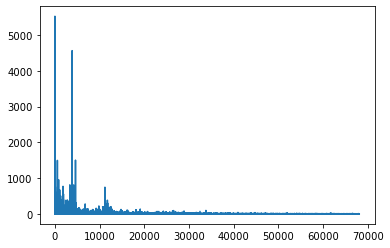

In [10]:
users['rating_count'].plot() # rating_count 분포 파악

In [11]:
users['rating_count'].describe()

count    59803.000000
mean         5.130094
std         35.517624
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5520.000000
Name: rating_count, dtype: float64

In [12]:
users.isna().sum()

user_id                0
age                    0
location_city          0
location_state         0
location_country       0
rating_count        8289
dtype: int64

rating_count 컬럼의 결측값은 대부분 user의 rating 기록이 없는 경우일 것이다.

따라서 rating_count 컬럼의 결측값은 0으로 채워 준다.

In [13]:
users['rating_count'].fillna(0, inplace=True)

In [14]:
users['rating_count'] = users['rating_count'].astype(int)

In [15]:
users.isna().sum()

user_id             0
age                 0
location_city       0
location_state      0
location_country    0
rating_count        0
dtype: int64

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68092 entries, 0 to 68091
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           68092 non-null  int64 
 1   age               68092 non-null  int64 
 2   location_city     68092 non-null  object
 3   location_state    68092 non-null  object
 4   location_country  68092 non-null  object
 5   rating_count      68092 non-null  int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 3.4+ MB


In [4]:
users.to_csv(data_path + 'v3/users.csv', index=False)